# Euler explicite:

Approche de cette équation différentielle par la méthode d'euler explicite:

   $$
    h'' = -g''\\
   $$
   
On l'approche de cette façon:
    $$ \left\lbrace \begin{aligned}
    t_{k+1} &= t_k + s,\\
    v_{k+1} &= v_k + w_k\, s,\\
    w_{k+1} &= w_k - g \,s.
    \end{aligned}\right.$$

Approche de cette équation différentielle par la méthode d'euler explicite:
    $$ \left\lbrace \begin{aligned}
    x''(t) = - \nu x'(t)\\
    y''(t) = -g - \nu y'(t)\\
    x'(t) = v_0 cos(\theta)\\
    y'(t) = v_0 sin(\theta)\\
    x(0) = 0\\
    y(0) = 0\\
    \end{aligned}\right.$$
On l'approche de cette façon:
* Pour le temps:
$$ \left\lbrace \begin{aligned}
    dx_{k+1} &= dx_k + s,\\
    dy_{k+1} &= dy_k + s,\\
    \end{aligned}\right.$$
* Pour la position :
    $$ \left\lbrace \begin{aligned}
    px_{k+1} &= px_k *dx_{k+1},\\
    py_{k+1} &= py_k *dy_{k+1},\\
    \end{aligned}\right.$$
* Pour la vitesse:
    $$ \left\lbrace \begin{aligned}
    vx_{k+1} &= dx_{k+1} (\nu * vx_k)\\
    vy_{k+1} &= dy_{k+1} (g + \nu * vy_k) \,s.
    \end{aligned}\right.$$

 # liens utiles:
 https://www.imo.universite-paris-saclay.fr/~ramond/Site/m104.html
http://joelcohen.github.io/ens/mpi/m104/
https://www.mathenvideo.fr/wp-content/uploads/2016/04/cadeau-equa-diff-second-ordre.pdf
http://www.cmap.polytechnique.fr/~lefebvre/SEMESTRE_EV2/Cours5.pdfhttp://www.cmap.polytechnique.fr/~lefebvre/SEMESTRE_EV2/Cours5.pdf

git remote add origin git@github.com:adblackx/DU.git


In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

g = 9.80665  # constante gravitationnelle sur Terre
h0 = 4.      # hauteur initiale
T = 1.       # temps final pour la simulation

In [36]:
def solution_exacte(h0, t):
    return np.maximum(h0 -0.5*t**2*g, 0)

In [50]:
def impact_exact(h0):
    return np.sqrt(2*h0/g)

In [21]:
def solution_ee(h0,t,dt): # version basique
    """
    solution approchée de la chute libre
    par la méthode d'Euler explicite

    Parameters
    ----------

    h0: double
        hauteur initiale
    t: double ou ndarray
        instants où la solution doit être retournée
    dt: double
        pas de temps pour la méthode numérique

    Returns
    -------

    double ou ndarray
    """
    
    tk = 0
    vk = h0
    wk = 0
    
    while tk<t:
        
        s = min(dt, t-tk) # on prends le pas de temps le plus petit
        
        tk += s
        vk += wk*s # position
        wk -= g*s # vitesse !!
        
    return vk

In [25]:
def solution_ee(h0, t, dt): # version optimisée, pour des array
    """
    solution approchée de la chute libre
    par la méthode d'Euler explicite

    Parameters
    ----------

    h0: double
        hauteur initiale
    t: double ou ndarray
        instants où la solution doit être retournée
    dt: double
        pas de temps pour la méthode numérique

    Returns
    -------

    double ou ndarray
    """
    
    def func(t,ut):
        return np.array([ut[1], -g]) # comme on ajoute -
    
    
    
    all_t = np.array([t]) if np.isscalar(t) else t
    ind = np.argsort(all_t) # je range les temps
    v_res = np.zeros((all_t.size, 2))

    
    u_res = np.array([h0, 0], dtype='float') # conditions initiales qui sont ici
    tk = 0
    
    for t1 in range(all_t.size):
        temps_k = ind[t1]
        while tk<all_t[temps_k]:
            s = min(dt, all_t[temps_k]-tk)
            u_res += s*func(s,u_res)

            tk+= s
        v_res[t1] = u_res
    vh = np.maximum(v_res[:, 0].reshape(ind.size), 0) # on extrait la premire colonne
    
    return vh[0] if np.isscalar(t) else vh

In [44]:
def impact_ee(h0, dt):
    """
    instant de l'impact calculé numériquement
    par la méthode d'Euler explicite

    Parameters
    ----------

    h0: double ou ndarray
        hauteur initiale
    dt: double
        pas de temps pour la méthode numérique

    Returns
    -------

    double ou ndarray
    """
    
    def func(t,ut):
        return np.array([ut[1], -g ])
    
    u_init = np.array([h0, 0 ])
    
    if h0 == 0:
        return t
    
    tk = 0
    
    s = 0
    tk1=0
    h = u_init[0]
    while h > 0 :
        tk1=tk
        hold = u_init[0]
        
        u_init += dt * func(tk,u_init)
        tk+= dt

        h = u_init[0]
        
    return (tk1*h - tk* hold)/(h - hold)

In [27]:
dt = 1.e-2
for t in [0, 0.5, 1]:
    print(f'h({t:3.1f}) = {solution_ee(h0, t, dt):18.16f}')

h(0.0) = 4.0000000000000000
h(0.5) = 2.7986853750000011
h(1.0) = 0.0000000000000000


In [58]:
def run_tir(theta, dt):
    """
    calcul un tir avec un angle theta
    et retourne le point d'impact et toute la suite des positions
    Le schéma numérique de résolution de l'EDO
    est la méthode d'Euler explicite
    
    Parameters
    ----------
    
    theta: double
        l'angle d'incidence du tir
    
    dt: double
        pas de temps de la méthode
        
    Returns
    -------
    
    px: double
        position de l'impact
        
    posx, posy: ndarray, ndarray
        suite des positions
    """
    
    
    
    dtx = 0
    vx = v0*np.cos(theta)
    
    dty = 0
    vy = v0*np.sin(theta)
    
    posx, posy = [dtx], [dty]

    while dty>=0:
        
        dtx += dt*vx # position
        dty += dt*vy
        
        vx -= dt*nu*vx
        vy -= dt*(g +nu*vy)
        
        posx.append(dtx)
        posy.append(dty)
    
    return dtx, (posx, posy)

In [59]:
def run_tir(theta, dt):
    """
    calcul un tir avec un angle theta
    et retourne le point d'impact et toute la suite des positions
    Le schéma numérique de résolution de l'EDO
    est la méthode d'Euler explicite
    
    Parameters
    ----------
    
    theta: double
        l'angle d'incidence du tir
    
    dt: double
        pas de temps de la méthode
        
    Returns
    -------
    
    px: double
        position de l'impact
        
    posx, posy: ndarray, ndarray
        suite des positions
    """
    px, py, vx, vy = 0, 0, v0*np.cos(theta), v0*np.sin(theta)
    posx, posy = [px], [py]
    while py >= 0:
        px += dt*vx
        py += dt*vy
        vy -= dt * (g + nu*vy)
        vx -= dt * nu*vx
        posx.append(px)
        posy.append(py)
    
    return px, (posx, posy)

# Exemple de plot:

In [32]:
def plot_position(dt):
    """ trace la position en fonction du temps """
    vt_e = np.linspace(0, T, 1025)
    #vh_e = solution_exacte(h0, vt_e)

    vt_a = np.linspace(0, T, 17)
    vh_a = solution_ee(h0, vt_a, dt)

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    
    #ax.plot(vt_e, vh_e, label='exact') #  courbe ici
    ax.scatter(vt_a, vh_a, label='euler explicit')

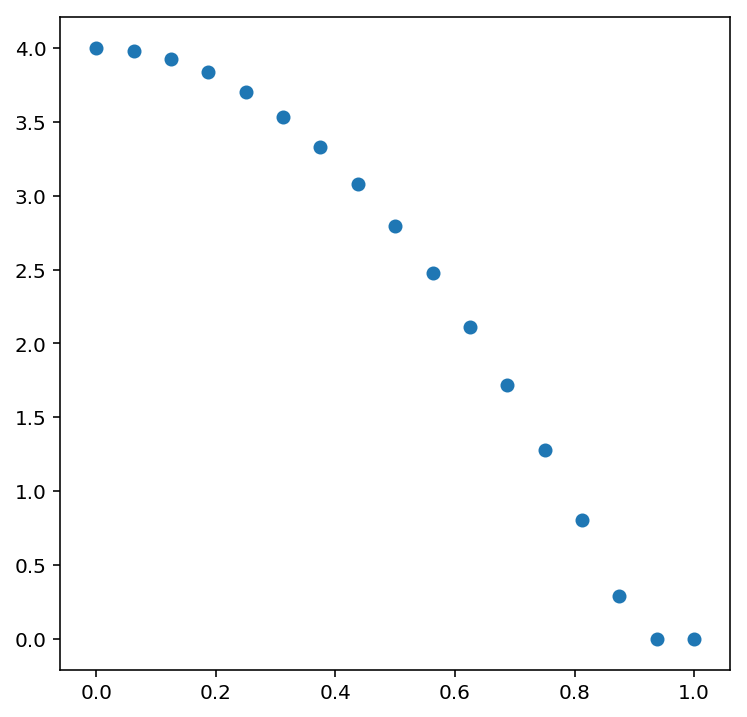

In [33]:
plot_position(1.e-2)

In [51]:
def plot_dureechute(dt):
    """ trace la durée de la chute en fonction de la hauteur initiale """
    vh_e = np.linspace(0, 2, 1025)
    vtf_e = impact_exact(vh_e)

    vh_a = np.linspace(0, 2, 257)
    vtf_a = np.array([
        impact_ee(hk, dt) for hk in vh_a
    ])

    fig = plt.figure(figsize=(12, 6))
    
    ax1 = fig.add_subplot(121)
    ax1.plot(vh_e, vtf_e, label='exact')
    ax1.scatter(vh_a, vtf_a, label='euler explicit')
    ax1.set_title('Durée de la chute')
    ax1.set_xlabel(f'$h_0$')
    ax1.set_ylabel(f'$t_f$')
    ax1.legend()
    
    verr = abs(vtf_a - impact_exact(vh_a))
    ax2 = fig.add_subplot(122)
    ax2.scatter(vh_a, verr)
    ax2.set_title('Erreur dans la durée de la chute')
    ax2.set_xlabel(f'$h_0$')
    ax2.set_ylabel(f'$e$')

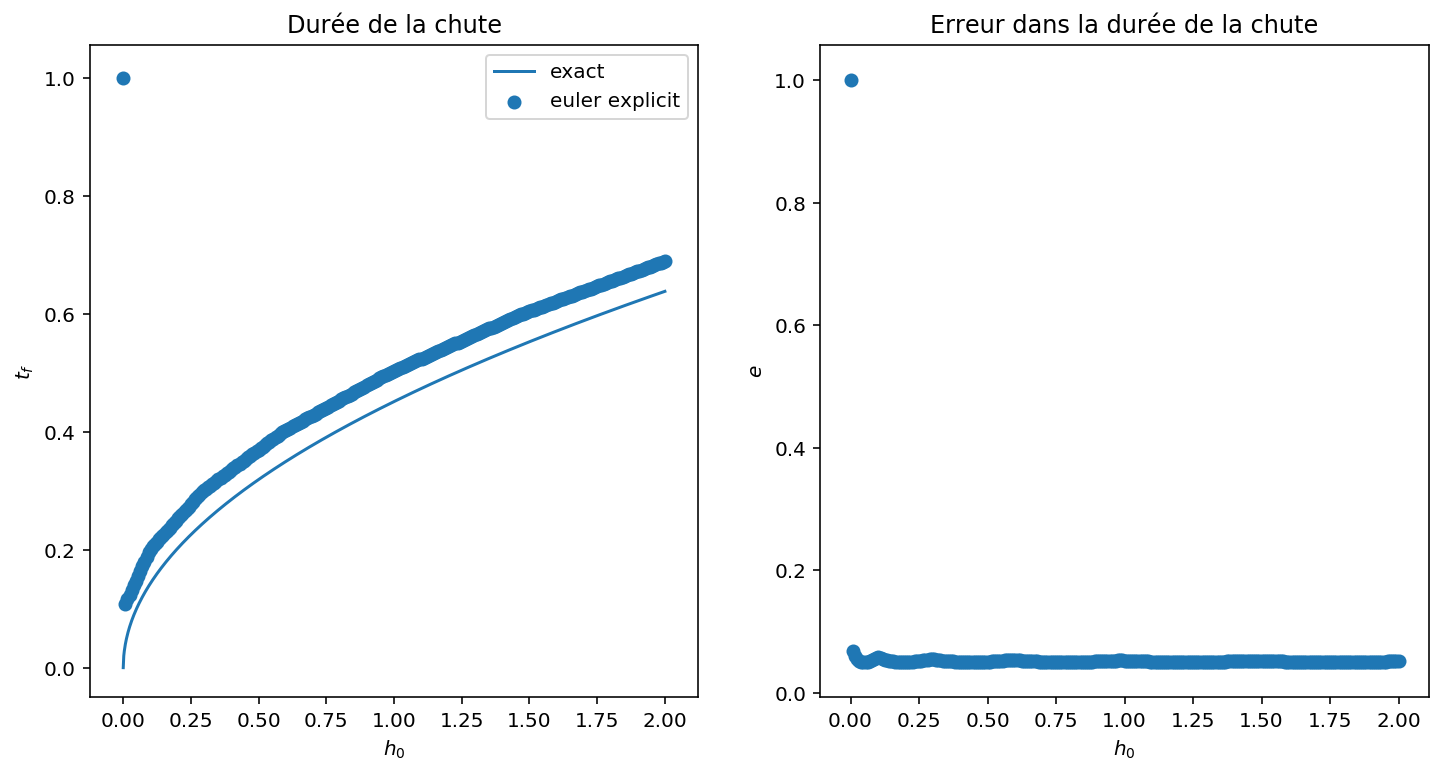

In [52]:
plot_dureechute(1.e-1)

# Erreur:

In [37]:
def plot_erreur():
    """ trace l'erreur à l'instant t=0.5 en fonction du pas de temps """
    Tf = 0.5
    he = solution_exacte(h0, Tf)
    vdt = np.array([1./2**k for k in range(2, 10)])
    ver = np.array([abs(solution_ee(h0, Tf, dt) -he) for dt in vdt])
    print(vdt)
    print(ver)

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.plot(vdt, vdt, label="droite de pente 1")
    ax.scatter(vdt, ver, label='euler explicit')
    ax.set_xscale('log')# LOGARITHME MA GEULE
    ax.set_yscale('log')
    ax.set_title(f"Erreur à l'instant $t={Tf}$")
    ax.set_xlabel(f'$\Delta t$')
    ax.set_ylabel(f'erreur')
    ax.legend()

[0.25       0.125      0.0625     0.03125    0.015625   0.0078125
 0.00390625 0.00195312]
[0.61291562 0.30645781 0.15322891 0.07661445 0.03830723 0.01915361
 0.00957681 0.0047884 ]


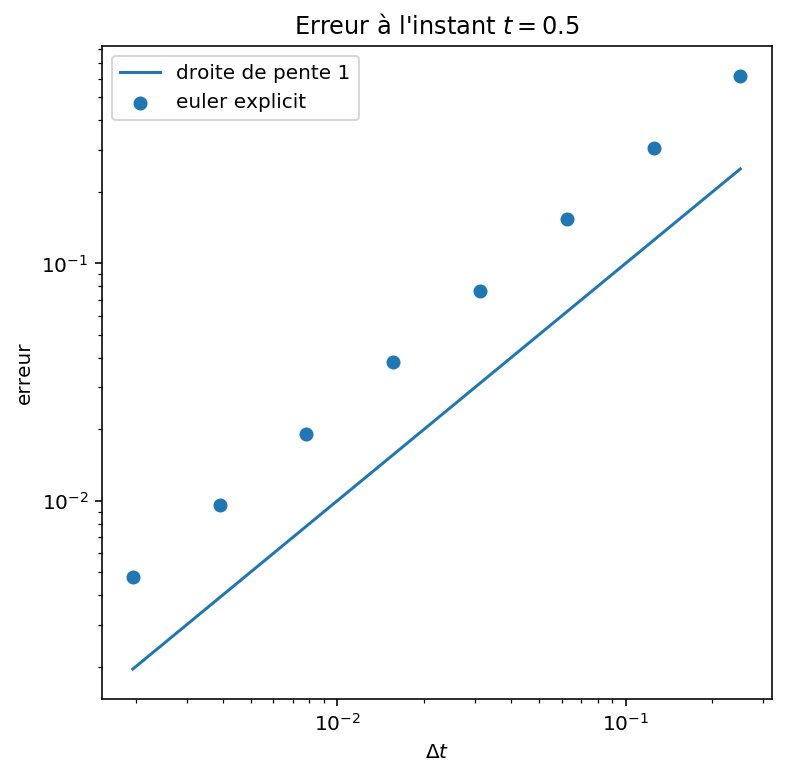

In [38]:
plot_erreur()

# Infos utiles:

On peut approcher le temps final avec l'algorithme d'euler,


In [42]:
if np.isscalar([2,2,21,32,13,2132,1]):
    print("c'est un entier")
else:
     print("sinon")

sinon


# Dichotomie:

On cherche à résoudre f(x) = 0, lorsqu'on sait qu'il existe x0 tel que f(x0) = 0 dans un interballe a,b 

In [55]:
def dichotomie(f, a, b, epsilon, verb=False):
    """
    Méthode de la dichotomie pour résoudre f(x) = 0 entre a et b
    à epsilon près
    
    Description
    -----------
    
    Si c = dichotomie(f, a, b, epsilon)
    alors la solution x de f(x)=0 est telle que |x-c| < epsilon/2
    
    Si f(a)*f(b) > 0 alors le programme affiche un message et retourne None
    
    Parameters
    ----------
    
    f: function
        la fonction dont on cherche le 0
        
    a: double
        la borne de gauche
        
    b: double
        la borne de droite
        
    epsilon: double
        la précision de la méthode
        
    verb: bool
        verbosity
        
    Returns
    -------
    
    c: double
        la racine cherchée
    """
    fa, fb = f(a), f(b)

    if fa * fb > 0:
        print("Error in dichotomie")
        return None
    compt = 0
    c = 0
    while abs(b-a) > epsilon:
        c = .5*(a+b)
        fc = f(c)
        if fc*fa >= 0:
            a, fa = c, fc
        if fc*fb >= 0:
            b, fb = c, fc
        compt += 1
        if verb:
            print(f"Dichotomie: it = {compt}, c={c}, b-a={b-a:10.3e}")
    return .5*(a+b)

In [57]:
def zF(d, nu):
    """
    Fonction qui détermine les 2 zéros de la fonction F
    lorsqu'ils existent
    la méthode utilisée est la dichotomie
    
    Les deux zéros sont les angles qui permettent d'atteindre
    la cible à la distance d avec le coefficient de frottement nu
    
    Parameters
    ----------
    
    d: double
        la distance visée
        
    nu: double
        le coefficient de frottement
        
    Returns
    -------
    
    theta_1, theta_2: double, double
        les angles cherchés (None si pas trouvé)
    """
    
    # lambda permet alors de parametrer la valeur de x cible
    # ici dans dichotomie, si on appelle F(x), alors seulement x sera remplacé, 
    # pas besoin de redonner toutes les valeurs à chaque fois
    
    epsilon = 1.e-3
    theta_1 = dichotomie(
        lambda x: F(x, d, nu), 
        0, .25*np.pi, epsilon
    )
    theta_2 = dichotomie(
        lambda x: F(x, d, nu),
        .25*np.pi, .5*np.pi, epsilon
    )

    return theta_1, theta_2